Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell.

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Mark Yamakaitis"

# Two-dimensional lid-driven cavity flow

For the take-home part of the final exam, you will solve the two-dimensional Navier-Stokes equations for an incompressible flow in a square cavity.

The non-dimensional Navier-Stokes equation in vector form:

$$
\begin{equation}
    \frac{\partial \mathbf{u}}{\partial t} + \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} = - \nabla p + \frac{1}{Re} \nabla^2 \mathbf{u}
\end{equation}
$$

where $\mathbf{u}$ is the velocity vector field, $p$ is the pressure scalar field, and $Re$ is the Reynolds number.

The equation above represents three scalar equations, one for each velocity component.
But you will solve it in two dimensions, so there will be two scalar equations.

The continuity equation for an incompressible flow is:

$$
\begin{equation}
    \nabla \cdot \mathbf{u} = 0
\end{equation}
$$

It says that the velocity field is divergence-free.

You will use an explicit scheme to discretize the equations in time:

$$
\begin{equation}
    \frac{\mathbf{u}^{n+1} - \mathbf{u}^n}{\Delta t} = -\nabla p - \left[ \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} \right]^n + \frac{1}{Re} \left[ \nabla^2 \mathbf{u} \right]^n
\end{equation}
$$

### Fractional-step method

To solve the equations, you will use a fractional-step method.
The essence of the method is to first solve an equation for an intermediate velocity field that does not satisfy the continuity equation.
In a second step, the intermediate velocity is projected onto the space of divergence-free fields.

First, we solve an equation for an intermediate velocity field $\mathbf{u}^\star$ is:

$$
\begin{equation}
    \frac{\mathbf{u}^\star - \mathbf{u}^n}{\Delta t} = - \left[ \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} \right]^n + \frac{1}{Re} \left[ \nabla^2 \mathbf{u} \right]^n
\end{equation}
$$

(It corresponds to the discrete Navier-Stokes equation without the pressure-gradient term.)

The projection-step equation is:

$$
\begin{equation}
    \frac{\mathbf{u}^{n+1} - \mathbf{u}^\star}{\Delta t} = -\nabla p
\end{equation}
$$

which, after re-arranging the terms, is equivalent to:

$$
\begin{equation}
    \mathbf{u}^{n+1} = \mathbf{u}^\star - \Delta t \; \nabla p
\end{equation}
$$

Calculating $\mathbf{u}^{n+1}$ requires us to first get the pressure field $p$.
We can derive an equation for the pressure by taking the divergence on both sides of the projection equation:

$$
\begin{equation}
    \nabla \cdot \mathbf{u}^{n+1} = \nabla \cdot \mathbf{u}^\star - \Delta t \; \nabla^2 p
\end{equation}
$$

Because we require the final velocity to have no divergence, we get:

$$
\begin{equation}
    \nabla^2 p = \frac{1}{\Delta t} \nabla \cdot \mathbf{u}^\star
\end{equation}
$$

This is our pressure Poisson equation.

You will discretize the spatial operators using central-difference formula.
As a reminder:

$$
\begin{equation}
    \frac{\partial f}{\partial x}\Big|_{i, j} = \frac{f_{i, j+1} - f_{i, j-1}}{2 \Delta x} + \mathcal{O} \left( \Delta x^2 \right)
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial f}{\partial y}\Big|_{i, j} = \frac{f_{i+1, j} - f_{i-1, j}}{2 \Delta y} + \mathcal{O} \left( \Delta y^2 \right)
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial^2 f}{\partial x^2}\Big|_{i,j} = \frac{f_{i, j-1} - 2 f_{i, j} + f_{i, j+1}}{\Delta x^2} + \mathcal{O} \left( \Delta x^2 \right)
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial^2 f}{\partial y^2}\Big|_{i,j} = \frac{f_{i-1, j} - 2 f_{i, j} + f_{i+1, j}}{\Delta y^2} + \mathcal{O} \left( \Delta y^2 \right)
\end{equation}
$$

In summary, each time step you should:

1. Solve the two-dimensional discrete Navier-Stokes equation without the pressure-gradient term for the intermediate velocity field $\mathbf{u}^\star$.

$$
\begin{eqnarray}
    \frac{u_{ij}^\star - u_{ij}^n}{\Delta t} = - u_{ij}^n \frac{u_{i, j+1}^n - u_{i, j-1}^n}{2 \Delta x} - v_{ij}^n \frac{u_{i+1, j}^n - u_{i-1, j}^n}{2 \Delta y} + \frac{1}{Re} \left( \frac{u_{i, j-1}^n - 2 u_{ij}^n + u_{i, j+1}^n}{\Delta x^2} + \frac{u_{i-1, j}^n - 2 u_{ij}^n + u_{i+1, j}^n}{\Delta y^2} \right) \\
    \frac{v_{ij}^\star - v_{ij}^n}{\Delta t} = - u_{ij}^n  \frac{v_{i, j+1}^n - v_{i, j-1}^n}{2 \Delta x} - v_{ij}^n \frac{v_{i+1, j}^n - v_{i-1, j}^n}{2 \Delta y} + \frac{1}{Re} \left( \frac{v_{i, j-1}^n - 2 v_{ij}^n + v_{i, j+1}^n}{\Delta x^2} + \frac{v_{i-1, j}^n - 2 v_{ij}^n + v_{i+1, j}^n}{\Delta y^2} \right) \\
\end{eqnarray}
$$

2. Solve the Poisson equation for the pressure field $p$.

$$
\begin{equation}
    \frac{p_{i, j-1} - 2 p_{ij} + p_{i, j+1}}{\Delta x^2} + \frac{p_{i-1, j} - 2 p_{ij} + p_{i+1, j}}{\Delta y^2} = \frac{1}{\Delta t} \left( \frac{v_{i, j+1}^\star - v_{i, j-1}^\star}{2 \Delta x} + \frac{u_{i+1, j}^\star - u_{i-1, j}^\star}{2 \Delta y} \right)
\end{equation}
$$

3. Update the intermediate velocity with the pressure gradient to get a divergence-free velocity field.

$$
\begin{eqnarray}
    u_{ij}^{n+1} = u_{ij}^\star - \Delta t \; \frac{p_{i, j+1} - p_{i, j-1}}{2 \Delta x} \\
    v_{ij}^{n+1} = v_{ij}^\star - \Delta t \; \frac{p_{i+1, j} - p_{i-1, j}}{2 \Delta y}
\end{eqnarray}
$$

### Your assignment

You will solve discrete equations in a square domain $\left[ 0, 1 \right] \times \left[ 0, 1 \right]$ using a uniform grid with the same grid spacing in $x$ and $y$ directions ($n_x = n_y = 41$, $\Delta x = \Delta y$).

The Reynolds number is set to $Re = 10$.

Initial conditions:

$$
\begin{eqnarray}
    u \left( t = 0 \right) &=&
    \begin{cases}
        1 \quad \text{at} \; y = 1 \\
        0 \quad \text{everywhere else}
    \end{cases} \\
    v \left( t = 0 \right) &=& 0 \\
    p \left( t = 0 \right) &=& 0
\end{eqnarray}
$$

Boundary conditions:

* At $x=0$: $u = 0$, $v = 0$, and $\frac{\partial p}{\partial x} = 0$
* At $x=1$: $u = 0$, $v = 0$, and $\frac{\partial p}{\partial x} = 0$
* At $y=0$: $u = 0$, $v = 0$, and $\frac{\partial p}{\partial y} = 0$
* At $y=1$: $u = 1$, $v = 0$, and $p = 0$

Compute $n_t = 9000$ time steps with a time-step size $\Delta t = 10^{-4}$.

To solve the discrete pressure Poisson equation, you will implement and use the method of conjugate gradients that we implemented in class.
If you wish, you can even use Numba to accelerate the time to convergence of the Poisson equation.

You should stop the conjugate-gradient solver once the normalised $L_2$-norm of the difference is smaller or equal than $10^{-6}$, i.e. when:

$$
\begin{equation}
    \frac{\| p^{k+1} - p^k \|_{L_2}}{n_{x}n_{y}} \leq 10^{-6}
\end{equation}
$$

<img src="grid_figure.png" width="700">

**Note** : To follow the above figure as well as the indexing in the above discretized equations, we firstly need to decide on the axes-orientation and secondly to meet the Python axes-direction. In order to keep physical orientation in our computational grid (again that's just a personal preference) we initialise our variable as **[ny, nx]** and in order to meet Python axes-direction we flip the top (north) and bottom (south) BC, by maintaining the rest as they are.

## Implement your solution (50 points)

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
#-------- Import libraries --------
import numpy as np
import matplotlib.pyplot as pyp

In [3]:
class Flow2D:
    def __init__(self, Re, dt, GridN, xlims, ylims):
        
        self.Re = Re
        self.dt = dt
        
        self.U = np.zeros(GridN, dtype = np.float64)
        self.V = np.zeros(GridN, dtype = np.float64)      
        self.P = np.zeros(GridN, dtype = np.float64)
        
#         self.Udiv, self.Vdiv = np.copy(self.U), np.copy(self.V)
        
        self.X = np.linspace(*xlims, Grid[1])
        self.Y = np.linspace(*ylims, Grid[0]) #switching the y here
        
        self.dx, self.dy = self.X[1] - self.X[0], np.abs(self.Y[1] - self.Y[0]) # if there's a sign error its here

    
    def Solve(self, nt):
        self.ApplyBC()
        for n in range(nt):
            self.Step()
            
    def Step(self):
        
        self.VelField_Divergent() # calculate the divergent velocity field
        self.SolveP()
        dpdx, dpdy = self.GradP()
        self.U[1:-1, 1:-1] -= self.dt*dpdx
        self.V[1:-1, 1:-1] -= self.dt*dpdy
        
        self.ApplyBC() # apply the boundary conditions      
        
    def VelField_Divergent(self):
        
        du_conv, dv_conv = self.Accel_Conv()
        du_diff, dv_diff = self.Accel_Diff()
        
        self.U[1:-1, 1:-1] += self.dt*(-du_conv + du_diff)
        self.V[1:-1, 1:-1] += self.dt*(-dv_conv + dv_diff)
        
    def Accel_Conv(self):
        u = self.U[1:-1, 1:-1]
        v = self.V[1:-1, 1:-1]
        
        ((dudx, dudy), (dvdx, dvdy)) = self.DeformationRates()
        
        conv_u = u * dudx + v * dudy
        conv_v = u * dvdx + v * dvdy
        
        return conv_u, conv_v
    
    def DeformationRates(self):
        u, v = self.U, self.V
        
        dudx, dudy = (u[1:-1,2:] - u[1:-1, :-2])/ (2*self.dx), (u[2:, 1:-1] - u[:-2, 1:-1]) / (2*self.dy) 
        dvdx, dvdy = (v[1:-1,2:] - v[1:-1, :-2])/ (2*self.dx), (v[2:, 1:-1] - v[:-2, 1:-1]) / (2*self.dy)
        
        return (dudx, dudy), (dvdx, dvdy)
        
    def Accel_Diff(self):
        """
        diffuse u and v using 2nd order central difference
        """
        u, v = self.U, self.V
        
        diff_u = ((u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])/self.dy**2 + 
                  (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2])/self.dx**2)
        
        diff_v = ((v[2:, 1:-1] - 2*v[1:-1, 1:-1] + v[:-2, 1:-1])/self.dy**2 + 
                  (v[1:-1, 2:] - 2*v[1:-1, 1:-1] + v[1:-1, :-2])/self.dx**2)
        
        return diff_u/self.Re, diff_v/self.Re
        
    def SolveP(self, maxiters = 5000, tolerance = 1e-9):
        iters = 0
        difference = np.inf
        
        divUV = self.Divergence() # divergence of the velocity field
        
        P = self.P
        
        r = np.zeros_like(P)
        r[1:-1, 1:-1] = divUV/self.dt - self.Laplacian(P) # residual between laplacian of pressure and divergence of velocity
        d = r # initial search direction, conjugate to residual
        Ld = np.zeros_like(P)
        
        while difference > tolerance and iters < maxiters:
            P_old, r_old = np.copy(P), np.copy(r) 
            Ld[1:-1, 1:-1] = self.Laplacian(d) # Laplacian of search direction
            alpha = np.sum(r*r) / np.sum(Ld*d) # Step size to update solution in search direction
            
            P += alpha*d
            r = r - alpha*Ld # update residual            
            
            beta = np.sum(r*r) / np.sum(r_old*r_old) # find value to make new direction orthogonal
            d = r + beta*d # update direction
            
            difference = np.sqrt(np.sum((P - P_old)**2)) / (self.P.size)
            iters += 1
        
        self.P = P # I think this is unnecessary, but better not risk it       

    
    def Divergence(self):
        ((dudx, _), (_, dvdy)) = self.DeformationRates()
        
        divergence = dudx + dvdy
        return divergence
        
    def Laplacian(self, var):        
        
        # i swear to god that the commented code is exactly the same, but it doesn't work
#         laplacian = ((var[2:, 1:-1] - 2*var[1:-1, 1:-1] + var[:-2, 1:-1])/self.dy**2 +
#                      (var[1:-1, 2:] - 2*var[1:-1, 1:-1] + var[1:-1, :-2])/self.dx**2)
        laplacian = (1 / self.dx**2 * (var[1:-1, 2:] + var[1:-1, :-2]) + 
                     1 / self.dy**2 * (var[2:, 1:-1] + var[:-2, 1:-1]) -
                     4 * (1/self.dx**2) * var[1:-1, 1:-1])    

        return laplacian
        
    def GradP(self):
        dpdx = (self.P[1:-1, 2:] - self.P[1:-1, :-2]) / (2*self.dx)
        dpdy = (self.P[2:, 1:-1] - self.P[:-2, 1:-1]) / (2*self.dy)
        
        return dpdx, dpdy

    def ApplyBC(self):
        self.U[:, 0] = 0 # Left Edge
        self.V[:, 0] = 0 #
        self.P[:, 0] = self.P[:, 1]
        
        self.U[:,-1] = 0 # Right Edge
        self.V[:,-1] = 0 #
        self.P[:,-1] = self.P[:,-2]
        
        self.U[-1, :] = 1 #Top Edge
        self.V[-1, :] = 0 
        self.P[-1, :] =  0
        
        self.U[0, :] = 0 #Bottom Edge
        self.V[0, :] = 0 
        self.P[0, :] = self.P[1, :]
        
    def Primitives(self):
        return self.X, self.Y, self.U, self.V, self.P
        

In [4]:
Reynolds = 10
TimeStep = 1e-4
Steps = 9000

xlims = (0, 1.0)
ylims = (0, 1.0)

Grid = (41, 41) # ny, nx

In [5]:
CavityFlow = Flow2D(Reynolds, TimeStep, Grid, xlims, ylims)
CavityFlow.Solve(Steps)

In [6]:
import matplotlib.pyplot as pyp

In [7]:
X, Y, U, V, P = CavityFlow.Primitives()

## Assessment (50 points)

Answer questions in this section.

Do not try to delete or modify the cells that are already present.
For each question, make sure to provide your answer in the cell **just above** the empty cell.

### Part 1 (15 points)

Plot the filled contour of the pressure scalar field and the streamlines of the velocity vector field after $9000$ time steps.

Here is a figure of what your solution should look like:

![figure1](cavity.png)

**Figure 1:** Filled contour of the pressure field and streamlines of the velocity field in a two-dimensional lid-driven cavity at Reynolds number $Re = 10$.

**Hint:** For the filled contour, I used the function [`pyplot.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with $51$ levels between $-1$ and $1$. For the velocity streamlines, I used the function [`pyplot.streamplot`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot).

Text(0, 0.5, 'y')

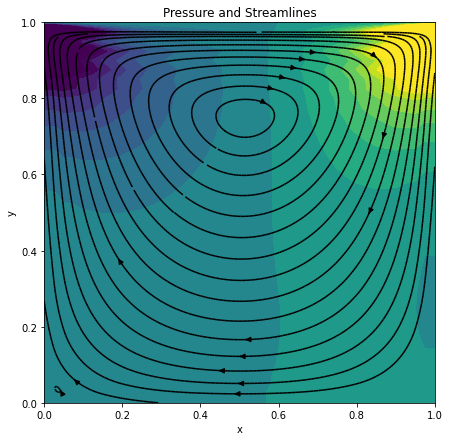

In [11]:
n = 19
x_starts = np.linspace(0,0.5,n)
y_starts = np.linspace(0,0.75,n)
starts = np.array([x_starts,y_starts]).T

fig, ax = pyp.subplots(1, figsize = (7,7))
ax.contourf(X, Y, P, vmin = -1, vmax = 1, levels = 101, extend = 'both')
ax.streamplot(X, Y, U, V, color = 'k', start_points = starts, density = 5)
ax.set_title("Pressure and Streamlines")
ax.set_xlabel("x")
ax.set_ylabel("y")

## Part 2 (20 points)

Compute the divergence of the velocity field after $9000$ time steps and plot the filled contour of the absolute value.

In two dimensional the divergence of the velocity vector field is:

$$
\begin{equation}
    \nabla \cdot \mathbf{u} = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}
\end{equation}
$$

To compute the divergence, you will use the following discrete version:

$$
\begin{equation}
    \left( \nabla \cdot \mathbf{u} \right)_{i, j} =  \frac{u_{i, j+1} - u_{i, j-1}}{2 \Delta x} + \frac{v_{i+1, j} - v_{i-1, j}}{2 \Delta y}
\end{equation}
$$

(Note that using the discrete equation above, the divergence will be computed only at interior points, not on the boundaries.)

Here is a figure of what your solution should look like:

![figure2](divergence.png)

**Figure 2:** Filled contour of the absolute divergence of the velocity field in a two-dimensional lid-driven cavity at Reynolds number $Re = 10$. ($51$ levels between $0$ and $1$.)

Text(0, 0.5, 'y')

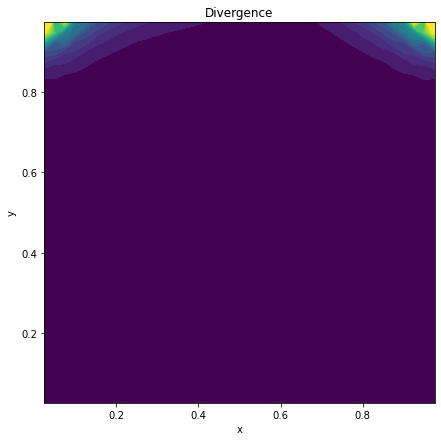

In [9]:
#-------- Write code --------
div = CavityFlow.Divergence()

fig, ax = pyp.subplots(1, figsize = (7,7))
ax.contourf(X[1:-1], Y[1:-1], np.abs(div), levels = 51, vmin = 0, vmax = 1, extend = 'both')
ax.set_title("Divergence")
ax.set_xlabel("x")
ax.set_ylabel("y")

## Part 3 (15 points)

What's the $L_2$-norm of the divergence $\nabla \cdot \mathbf{u}$ (after $9000$ time steps) divided by the number of interior points?

$$
\begin{equation}
    \frac{\| \nabla \cdot \mathbf{u} \|_{L_2}}{\left( n_x - 2 \right) \left( n_y - 2 \right)}
\end{equation}
$$

**Hint:** If everything goes smooth, you should obtain a _small_ value (I got a value of about $2.94 \times 10^{-3}$).

**Important:** Print your result.

In [10]:
#-------- Write code --------
L2norm = np.sqrt(np.sum(div*div)) / ((Grid[0]-2)*(Grid[1]-2))
print(L2norm)

0.0029456015209742563
